# TASK-6 Prediction through Decision Tree Algorithm


Problem

Create the Decison Tree Classifier and Visualize it graphically.

The purpose is if we need any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset
df = pd.read_excel('Iris.xlsx')

In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.shape

(150, 6)

In [11]:
df.drop(["Id"],axis='columns',inplace=True)

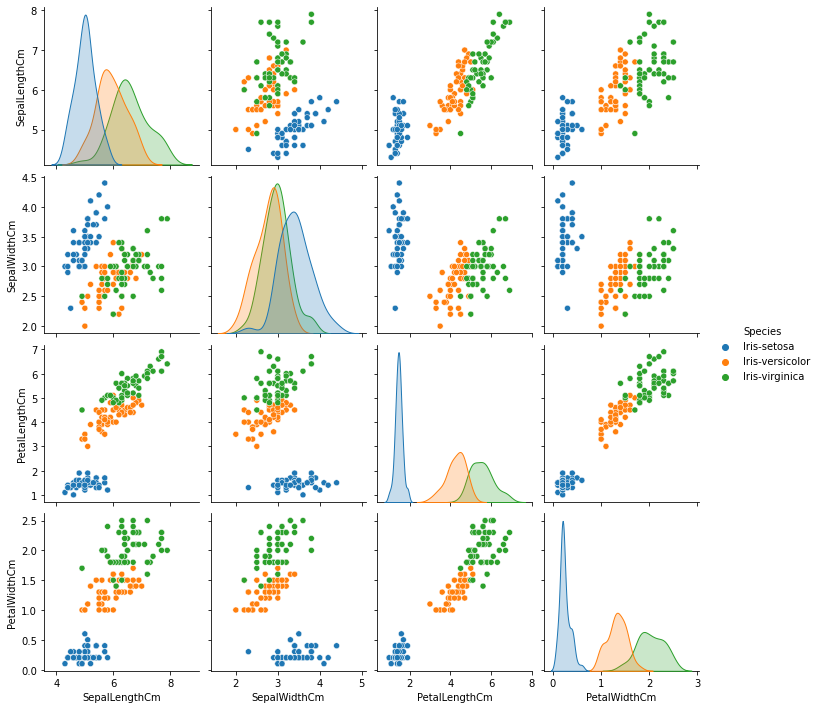

In [12]:
sns.pairplot(df,hue="Species")

In [13]:
#seperating features and labels
X=df.iloc[:, :-1].values
y=df.iloc[:,  -1].values

In [14]:
#label encoding the output 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [16]:
#performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

# Model Treatment

In [17]:
#importinf Decision Tree Classifier  skleran library,training the model using training sets
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='gini',random_state=None)
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

# Prediction

In [18]:
#Prediction for the test data
y_pred=classifier.predict(X_test)
y_pred=le.inverse_transform(y_pred)
y_test=le.inverse_transform(y_test)

In [19]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

# Confusion Matrix 

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confiusion_Matrix is:  \n",cm)
ac=accuracy_score(y_test,y_pred)
print("Accuracy_Score is:  \n",ac)

Confiusion_Matrix is:  
 [[ 7  0  0]
 [ 0 13  0]
 [ 0  0 10]]
Accuracy_Score is:  
 1.0


# Visualization through Decision Tree 

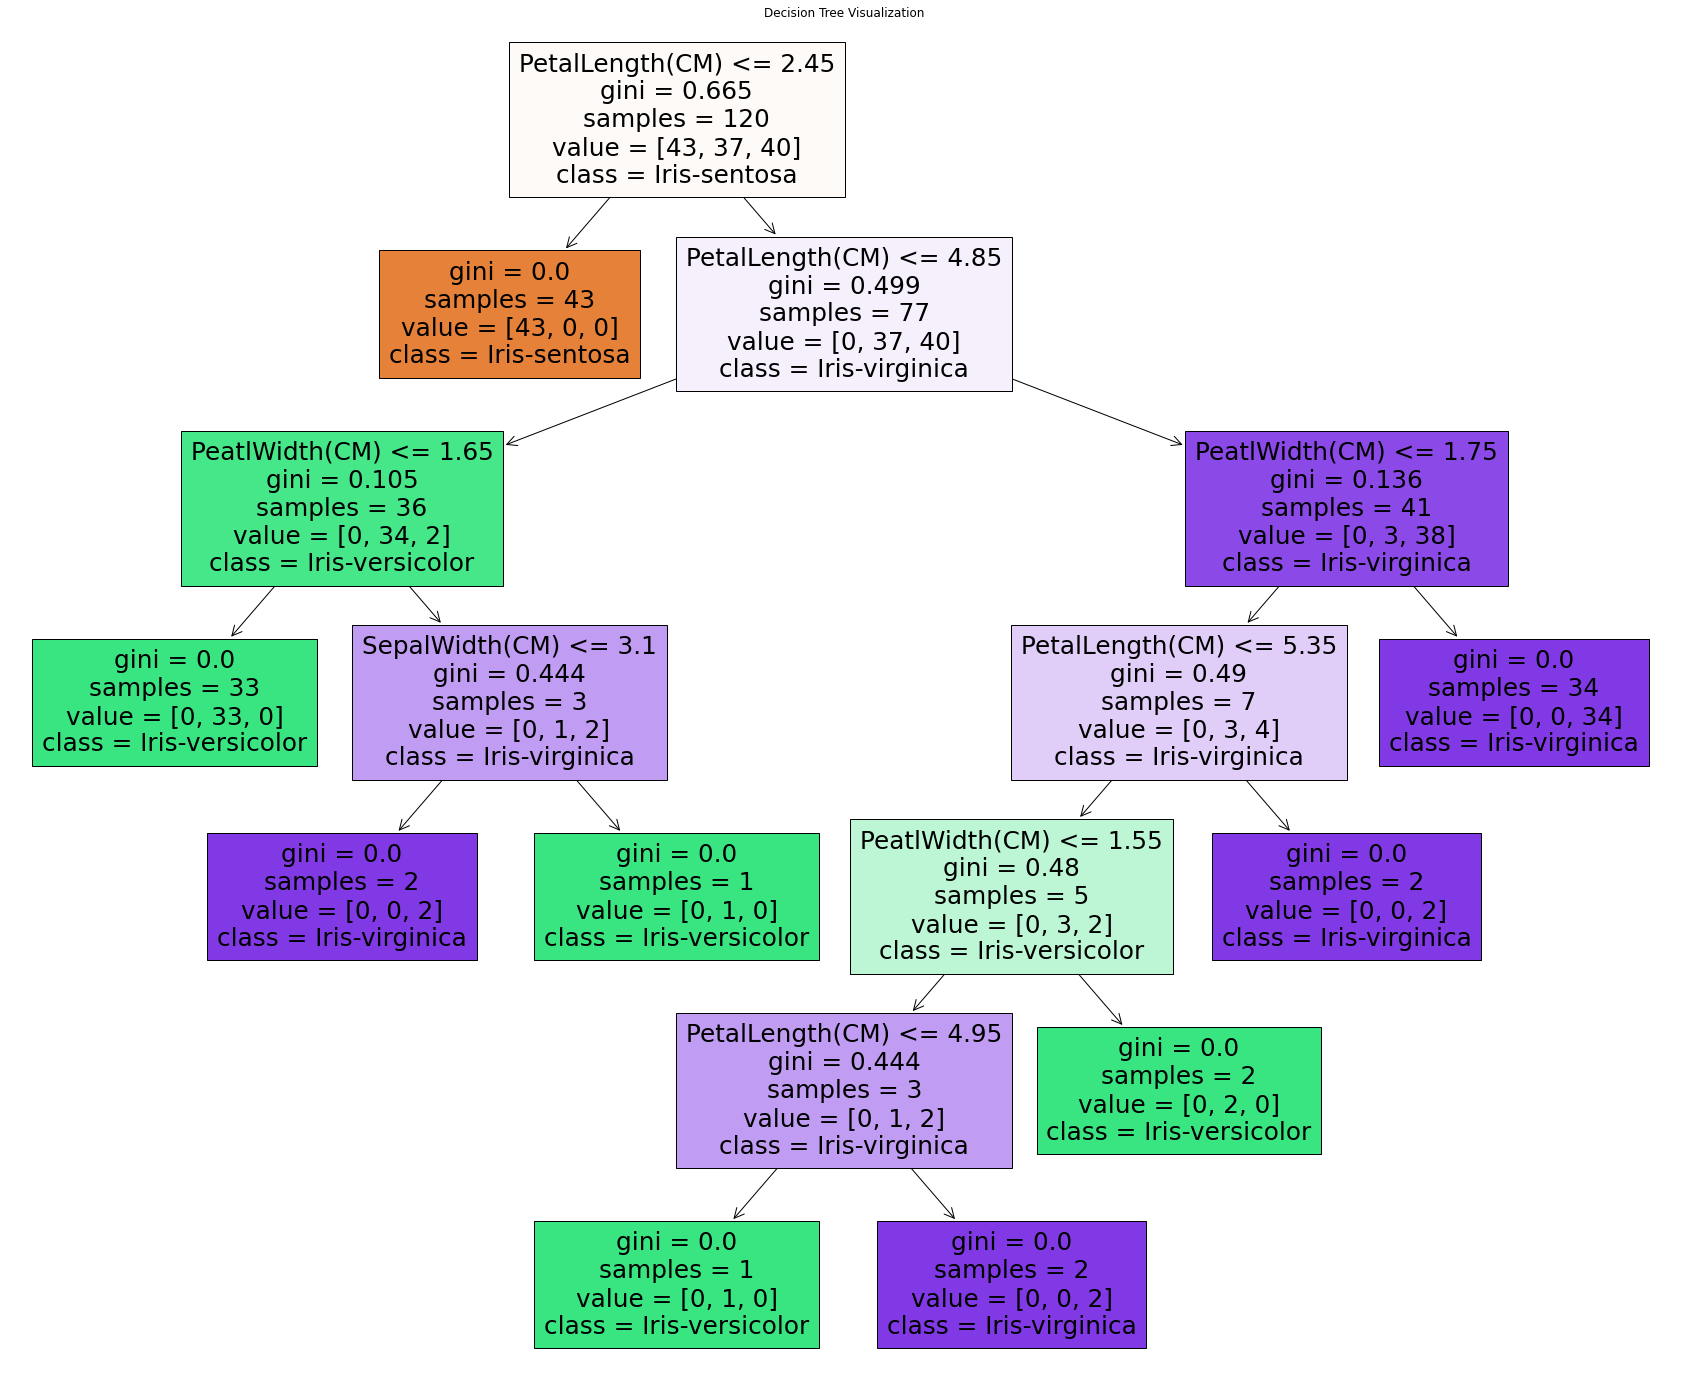

In [21]:
from sklearn  import tree 
plt.figure(figsize=(30,25))
dot_df=tree.plot_tree(classifier,feature_names=['SepalLength(CM)','SepalWidth(CM)','PetalLength(CM)','PeatlWidth(CM)'],class_names=['Iris-sentosa','Iris-versicolor','Iris-virginica'],filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Thanks & Regards

Ashish Srivastava